In [2]:
import networkx as nx  #https://www.geeksforgeeks.org/networkx-python-software-package-study-complex-networks/
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is in a file called 'facebook_combined.txt'
# The file contains edges in the format: node1 node2

G = nx.read_edgelist('facebook_combined.txt')

# Basic info about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed: {G.is_directed()}")
print(f"Graph density: {nx.density(G)}")

# Define start and goal nodes
start_node = '0'  # Example start node
goal_node = '100'  # Example goal node

# Ensure start_node and goal_node are in the graph
if start_node not in G or goal_node not in G:
    raise ValueError("Start or goal node not in graph")

Number of nodes: 4039
Number of edges: 88234
Is the graph directed: False
Graph density: 0.010819963503439287


In [4]:
def bfs(graph, start_node, end_node):
    visited = set()
    queue = [[start_node]]
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node == end_node:
            return path
        if node not in visited:
            neighbors = graph.neighbors(node)
            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
            visited.add(node)
    return None

In [6]:
def dfs(graph, start_node):
    visited = set()
    stack = [[start_node]]
    paths = []
    while stack:
        path = stack.pop()
        node = path[-1]
        if node not in visited:
            neighbors = graph.neighbors(node)
            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                stack.append(new_path)
            visited.add(node)
            paths.append(path)
    return paths

In [8]:
start_user = "1"
end_user = "999"

In [10]:
bfs_path = bfs(G, start_user, end_user)
dfs_paths = dfs(G, start_user)

In [16]:
print(f"BFS Path from {start_user} to {end_user}:", bfs_path)

BFS Path from 1 to 999: ['1', '0', '107', '999']


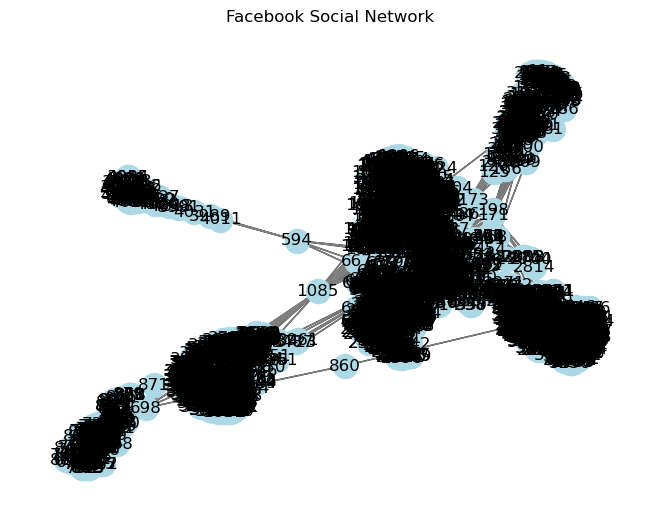

In [20]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray')
plt.title("Facebook Social Network")
plt.show()

C:\Users\sayan\AppData\Local\Temp\ipykernel_8176\3183824189.py:7: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(bfs_path_graph, pos_bfs, edgelist=bfs_path_graph.edges(), edge_color='red')


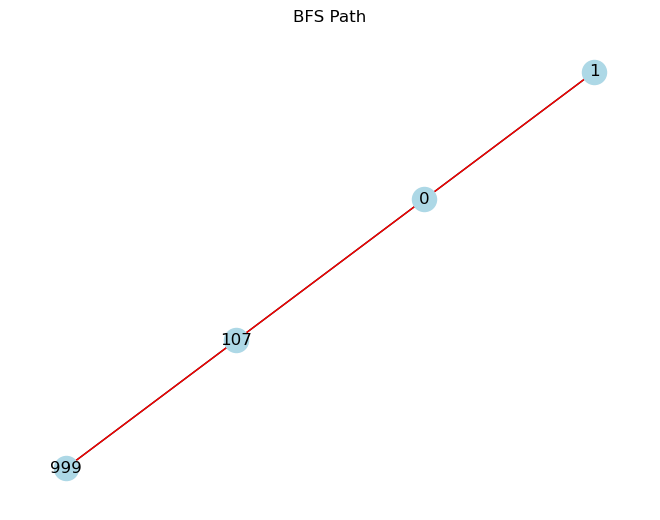

In [22]:
if bfs_path:
    bfs_path_edges = [(bfs_path[i], bfs_path[i+1]) for i in range(len(bfs_path)-1)]
    bfs_path_graph = nx.Graph()
    bfs_path_graph.add_edges_from(bfs_path_edges)
    pos_bfs = nx.spring_layout(bfs_path_graph)
    nx.draw(bfs_path_graph, pos_bfs, with_labels=True, node_color='lightblue')
    nx.draw_networkx_edges(bfs_path_graph, pos_bfs, edgelist=bfs_path_graph.edges(), edge_color='red')
    plt.title("BFS Path")
    plt.show()

In [ ]:
for i, path in enumerate(dfs_paths):
    dfs_path_edges = [(path[j], path[j+1]) for j in range(len(path)-1)]
    dfs_path_graph = nx.Graph()
    dfs_path_graph.add_edges_from(dfs_path_edges)
    pos_dfs = nx.spring_layout(dfs_path_graph)
    nx.draw(dfs_path_graph, pos_dfs, with_labels=True, node_color='lightblue')
    nx.draw_networkx_edges(dfs_path_graph, pos_dfs, edgelist=dfs_path_graph.edges(), edge_color='green')
    plt.title(f"DFS Path {i+1}")
    plt.show()